In [69]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Task3_risk_vs_portfolio.csv")
df.head()

,x,y
0,0.287578,1.164440
1,0.788305,-0.887802
2,0.408977,0.174131
3,0.883017,-0.217437
4,0.940467,-0.076454


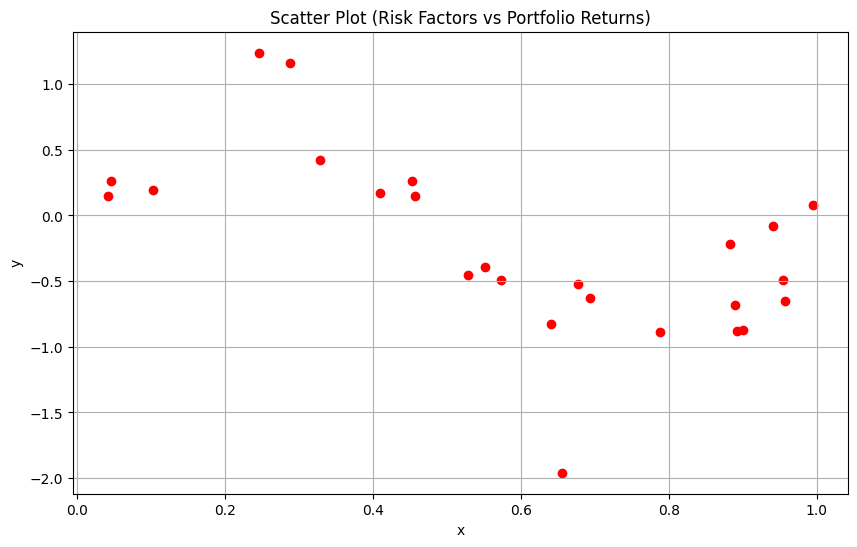

In [70]:
plt.figure(figsize=(10,6))
plt.scatter(df['x'], df['y'], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot (Risk Factors vs Portfolio Returns)')
plt.grid(True)
plt.show()

In [10]:
corr = df['x'].corr(df['y'])
print("Correlation between x and y:", corr)


Correlation between x and y: -0.5853901848565963


In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['x']]
y = df['y']

for degree in [1, 2, 3, 4, 5]:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    rmse = np.sqrt(-cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error', cv=5 ).mean())

    print(f"Degree {degree} → RMSE: {rmse:.4f}")


Degree 1 → RMSE: 0.5785
Degree 2 → RMSE: 0.6117
Degree 3 → RMSE: 0.3920
Degree 4 → RMSE: 0.4181
Degree 5 → RMSE: 0.4237


Polynomial RMSE : 0.4035622167879828
Polynomial R² : 0.21964721879641322


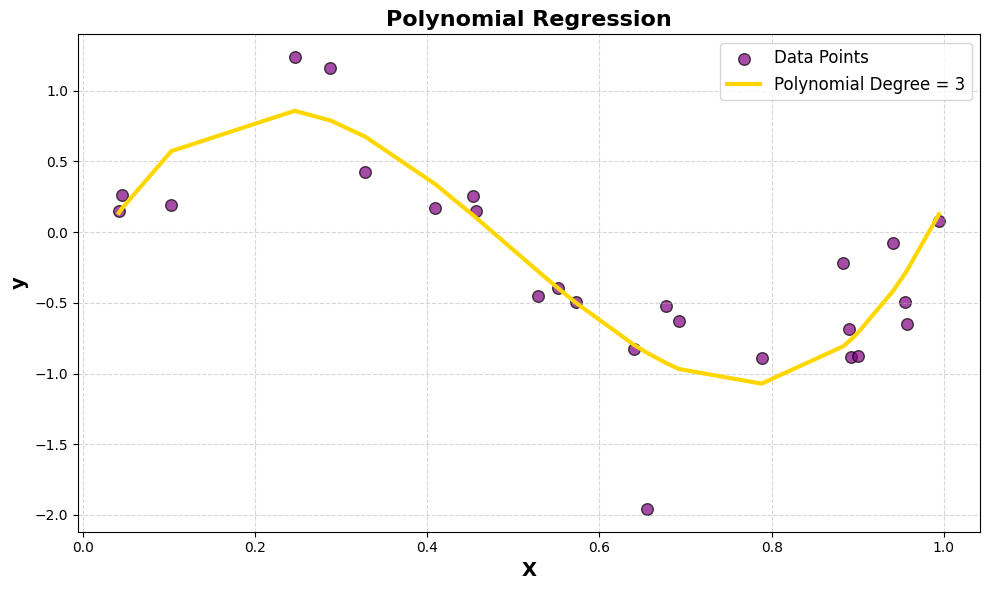

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)

model = LinearRegression()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rmse = -cross_val_score(model, X_poly, y, cv=kfold, scoring='neg_root_mean_squared_error')
print("Polynomial RMSE :", np.mean(rmse))

r2_score = cross_val_score(model, X_poly, y, cv=kfold, scoring='r2')
print("Polynomial R² :", np.mean(r2_score))

model.fit(X_poly, y)
y_pred = model.predict(X_poly)

X_sort = np.sort(X, axis=0)
y_pred_sort = model.predict(poly.transform(X_sort))

plt.figure(figsize=(10, 6))  
plt.scatter( X, y, color='purple', label='Data Points', s=70, alpha=0.7, edgecolor='k')
plt.plot( X_sort, y_pred_sort, color='gold', label='Polynomial Degree = 3', linewidth=3)

plt.xlabel('X', fontsize=14, fontweight='bold')
plt.ylabel('y', fontsize=14, fontweight='bold')
plt.title('Polynomial Regression', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()  
plt.show()



Best alpha (Ridge): 0.001
Ridge RMSE : 0.4023050870477151
Ridge R² : 0.23362272794061045


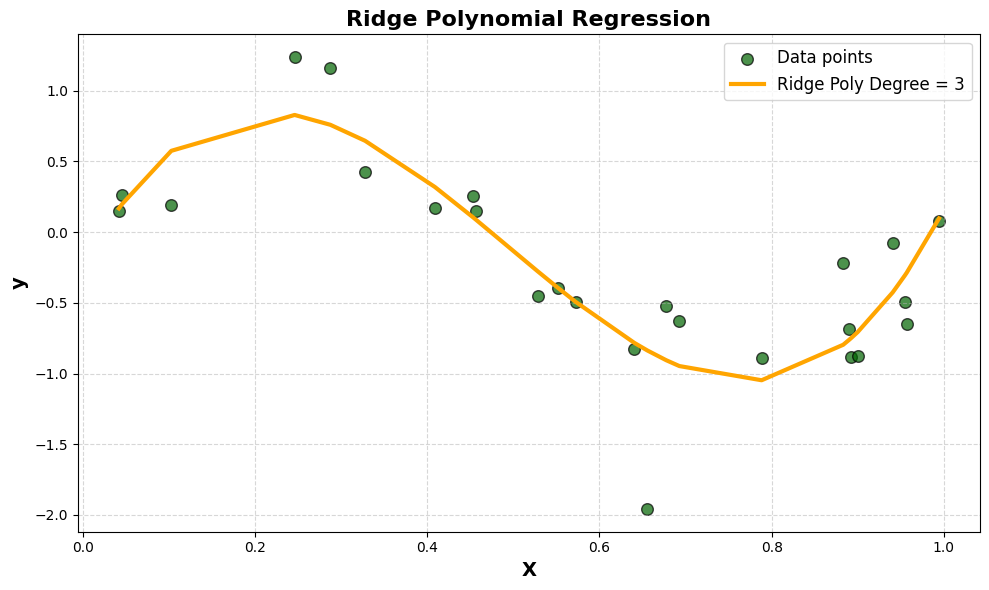

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

X = df[['x']].values 
y = df['y'].values

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

ridge = Ridge()

alpha_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(ridge, alpha_grid, cv=kfold, scoring='neg_root_mean_squared_error')
grid_search.fit(X_poly_scaled, y)

best_alpha = grid_search.best_params_['alpha']
print("Best alpha (Ridge):", best_alpha)

best_ridge = Ridge(alpha=best_alpha)
rmse_scores = -cross_val_score(best_ridge, X_poly_scaled, y, cv=kfold, scoring='neg_root_mean_squared_error')
print("Ridge RMSE :", np.mean(rmse_scores))

r2_scores = cross_val_score(best_ridge, X_poly_scaled, y, cv=kfold, scoring='r2')
print("Ridge R² :", np.mean(r2_scores))

best_ridge.fit(X_poly_scaled, y)
y_pred = best_ridge.predict(X_poly_scaled)

X_sorted = np.sort(X, axis=0)
X_sorted_poly_scaled = scaler.transform(poly.transform(X_sorted))
y_pred_sorted = best_ridge.predict(X_sorted_poly_scaled)

plt.figure(figsize=(10, 6)) 
plt.scatter(X, y, color='darkgreen', label='Data points', s=70, alpha=0.7, edgecolor='k')
plt.plot(X_sorted, y_pred_sorted, color='orange', label='Ridge Poly Degree = 3', linewidth=3) 

plt.xlabel('X', fontsize=14, fontweight='bold')
plt.ylabel('y', fontsize=14, fontweight='bold')
plt.title('Ridge Polynomial Regression', fontsize=16, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()  

plt.show()

